# 拼多多优惠券使用预测

## 任务说明

这一周我们接到了来自拼多多的任务委托，核心任务是进行消费者行为的预测。拼多多是国内主流的手机购物APP，成立于2015年9月，用户通过发起和朋友、家人、邻居等的拼团，以更低的价格，拼团购买商品。拼多多作为新电商开创者,致力于将娱乐社交的元素融入电商运营中,通过“社交+电商”的模式,让更多的用户带着乐趣分享实惠,享受全新的共享式购物体验。对于各大电商平台，在“双十一”这种大促时间段，优惠券会起到非常大的促销作用。那么，如何找到更容易使用优惠券的用户，对他们精准地推送与营销，从而在双十一期间使销售额大大提升呢？这就是我们需要支持拼多多共同分析与解决的一个问题。

## 任务事项

就是根据用户的基本信息以及过去的消费行为数据，完成以下事项：
- 使用Python建立逻辑回归模型
- 预测用户是否会在活动中使用优惠券
- 找到对用户使用优惠券影响较大的因素


## 任务要求

- 完整的数据分析流程（50%）
    - 数据概况分析
    - 单变量分析
    - 相关与可视化分析
    - 逻辑回归模型建立、评估与优化
- 准确的数据维度识别与python代码操作（30%）
- 提供对于模型结果的业务结论解读（20%）

## 认识数据

![jupyter](image.png)

## 数据分析流程

![jupyter](image1.png)

## 数据分析思路

![jupyter](image2.png)

# 数据准备

In [1017]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [1018]:
plt.rcParams['font.sans-serif']=['simhei']

In [1019]:
pdd = pd.read_csv('拼多多优惠券数据.csv')

In [1020]:
pdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 10 columns):
ID                            25317 non-null int64
age                           25317 non-null int64
job                           25317 non-null object
marital                       25317 non-null object
default                       25317 non-null object
returned                      25317 non-null object
loan                          25317 non-null object
coupon_used_in_last6_month    25317 non-null int64
coupon_used_in_last_month     25317 non-null int64
coupon_ind                    25317 non-null int64
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


- job,martal,default,returned,loan为类别变量，之后要做get_dummies操作
- ID这一列是没用的，之后要删去
- 没有数据缺失

In [1021]:
pdd.head()

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
0,1,43,management,married,no,yes,no,2,0,0
1,2,42,technician,divorced,no,yes,no,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0
3,4,28,management,single,no,yes,yes,2,0,0
4,5,42,technician,divorced,no,yes,no,5,0,0


In [1022]:
pdd.describe()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,2.772050,0.292847,0.116957
std,7308.532719,10.634289,3.136097,0.765498,0.321375
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,6330.000000,33.000000,1.000000,0.000000,0.000000
50%,12659.000000,39.000000,2.000000,0.000000,0.000000
75%,18988.000000,48.000000,3.000000,0.000000,0.000000
max,25317.000000,95.000000,55.000000,15.000000,1.000000


- age最大值为95岁，可能存在异常值
- coupon_used_in_last6_month分布较离散，可以后续采用分箱操作

# EDA和数据清洗

## 关键列

In [1023]:
pdd['coupon_ind'].value_counts(1)

0    0.883043
1    0.116957
Name: coupon_ind, dtype: float64

- 使用优惠券和未使用优惠券的数据不平衡
- 之后可能要进行下采样或上采样

## 数值变量

### 查看年龄的分布情况

In [1024]:
pdd['age'].describe()

count    25317.000000
mean        40.935379
std         10.634289
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

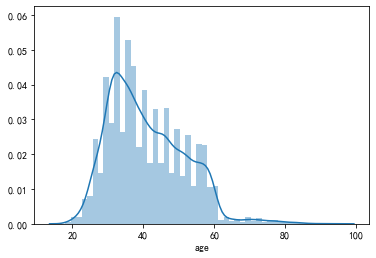

In [1025]:
import seaborn as sns
sns.distplot(pdd['age'])

- 年龄主要分布在20-60岁之间
- 大于60岁的可能是异常值，要去除一下


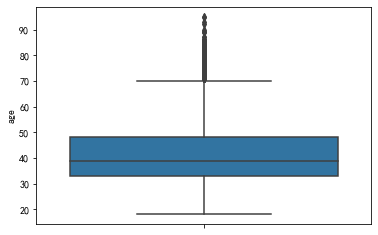

In [1026]:
sns.boxplot(y='age', data=pdd)

In [1027]:
# 规定大于75%+四分位差的1.5倍为异常值
newmax = pdd['age'].describe()['75%'] + 1.5*(pdd['age'].describe()['75%']-pdd['age'].describe()['25%']) 
print(newmax)
pdd[pdd['age']>newmax]['age'].count()

70.5


284

- 75%+四分位差的1.5倍为70.5，大于70.5的为异常值
- 大于70.5有284个数据

In [1028]:
# 去除异常值
pdd = pdd[pdd['age']<=newmax]

In [1029]:
# 查看年龄和是否使用优惠券的关系
pdd.groupby('coupon_ind')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
coupon_ind,,,,,,,,
0,22202.0,40.569859,9.751967,18.0,33.0,39.0,48.0,70.0
1,2831.0,40.207700,11.526063,18.0,31.0,37.0,49.0,70.0


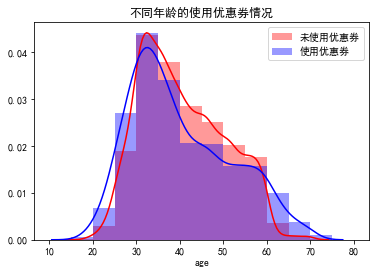

In [1030]:
bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
sns.distplot(pdd[pdd['coupon_ind']==0]['age'], bins=bins, color='red')
sns.distplot(pdd[pdd['coupon_ind']==1]['age'], bins=bins, color='blue')
plt.title('不同年龄的使用优惠券情况')
plt.legend(['未使用优惠券','使用优惠券'])

- 使用拼多多APP的用户年龄主要在在20-70之间
- 小于35岁和大于60岁的用户更倾向于使用优惠券
- 而在35~60岁间的用户更倾向于不使用优惠券
- 小于35岁的用户更倾向于使用优惠券的原因是比较好理解的，因为年轻用户对APP的使用更为熟悉，更容易掌握优惠券的用法，而大于60岁的用户由于数量比较少，是否能直接得出他们更倾向于使用优惠券这一结论是不太靠谱的；
- 而35岁到60岁之间的用户随着年龄增长用户量也随之减少，不倾向于使用优惠券的原因可能是不清楚APP推出的优惠券活动，或者是因为经济能力比较好而无需费心使用优惠券。

### 查看过去6个月优惠券使用情况分布

In [1031]:
pdd['coupon_used_in_last6_month'].describe()

count    25033.000000
mean         2.779171
std          3.146620
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         55.000000
Name: coupon_used_in_last6_month, dtype: float64

Text(0.5, 1.0, '过去6个月优惠券使用情况')

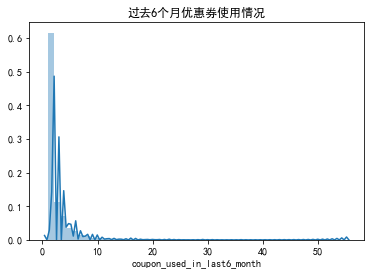

In [1032]:
sns.distplot(pdd['coupon_used_in_last6_month'])
plt.title('过去6个月优惠券使用情况')

- 过去6个月优惠券使用数量集中在0-10次之间

### 查看过去1个月优惠券使用情况分布

In [1033]:
pdd['coupon_used_in_last_month'].describe()

count    25033.000000
mean         0.289498
std          0.763161
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: coupon_used_in_last_month, dtype: float64

Text(0.5, 1.0, '过去1个月优惠券使用情况')

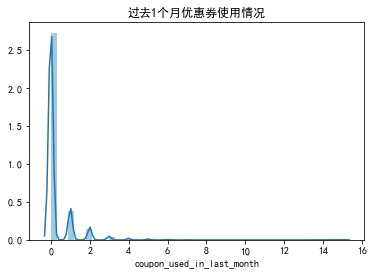

In [1034]:
sns.distplot(pdd['coupon_used_in_last_month'])
plt.title('过去1个月优惠券使用情况')

- 过去1个月优惠券使用数量集中在0-2次之间

## 类别变量

### 不同职业的用户的优惠券使用情况

In [1035]:
pdd['job'].value_counts()

blue-collar      5455
management       5287
technician       4239
admin.           2906
services         2342
retired          1026
self-employed     881
entrepreneur      855
unemployed        701
housemaid         650
student           533
unknown           158
Name: job, dtype: int64

Text(0.5, 1.0, '各个职业的用户数量')

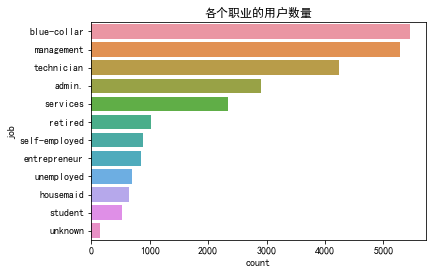

In [1036]:
sns.countplot(y='job',data=pdd, order=pdd['job'].value_counts().sort_values(ascending=False).index)
plt.title('各个职业的用户数量')

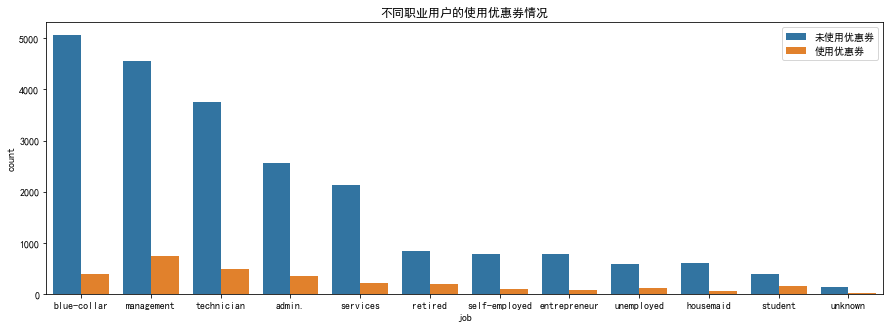

In [1037]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',data=pdd, hue='coupon_ind', order=pdd['job'].value_counts().sort_values(ascending=False).index)
plt.title('不同职业用户的使用优惠券情况')
plt.legend(['未使用优惠券','使用优惠券'])

In [1038]:
tmp = pd.DataFrame(pdd.groupby(['job'])['coupon_ind'].value_counts(1))
tmp = tmp.rename(columns={'coupon_ind':'rate'}).reset_index()
tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)


,job,coupon_ind,rate
17,student,1,0.268293
11,retired,1,0.178363
21,unemployed,1,0.162625
9,management,1,0.138453
1,admin.,1,0.116999
13,self-employed,1,0.116913
23,unknown,1,0.113924
19,technician,1,0.113234
15,services,1,0.090094
7,housemaid,1,0.081538


Text(0.5, 1.0, '不同职业用户的优惠券使用率')

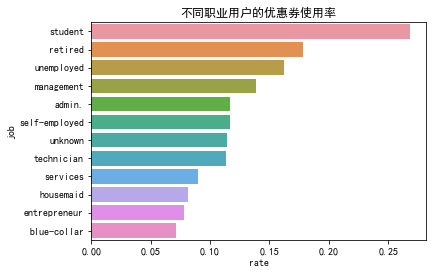

In [1039]:
orderlist = tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)['job'].tolist()
sns.barplot(y='job', x='rate', data=tmp[tmp['coupon_ind']==1], order=orderlist)
plt.title('不同职业用户的优惠券使用率')
# plt.legend(['未使用优惠券','使用优惠券'])

- 在所有职业中，blue-collar的用户最多，其次是management, technician, admin, services
- 使用了优惠券的用户中，management的用户最多，其次是technician, blue-collar, admin, services
- 但是在各个职业群体中，优惠券使用率最高的是学生、退休人员、无业、管理人员、行政人员

- 可以适当合并类别，这样使得后续建模的时候减少参数的数量

### 不同婚姻状态的用户的优惠券使用情况

In [1040]:
pdd['marital'].value_counts()

married     15035
single       7148
divorced     2850
Name: marital, dtype: int64

Text(0.5, 1.0, '不同婚姻状态的用户数量')

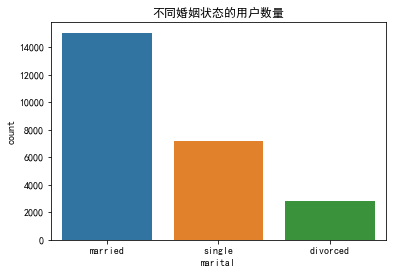

In [1041]:

sns.countplot(x='marital',data=pdd, order=pdd['marital'].value_counts().sort_values(ascending=False).index)
plt.title('不同婚姻状态的用户数量')

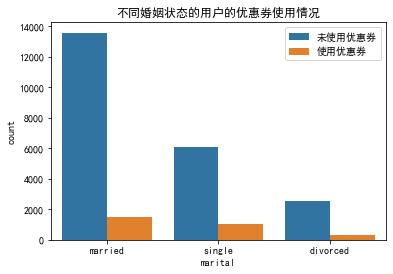

In [1042]:
sns.countplot(x='marital',hue='coupon_ind', data=pdd, order=pdd['marital'].value_counts().sort_values(ascending=False).index)
plt.title('不同婚姻状态的用户的优惠券使用情况')
plt.legend(['未使用优惠券','使用优惠券'])

In [1043]:
tmp = pd.DataFrame(pdd.groupby(['marital'])['coupon_ind'].value_counts(1))
tmp = tmp.rename(columns={'coupon_ind':'rate'}).reset_index()
tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)

,marital,coupon_ind,rate
5,single,1,0.146335
1,divorced,1,0.111228
3,married,1,0.097639


Text(0.5, 1.0, '不同婚姻状态用户的优惠券使用率')

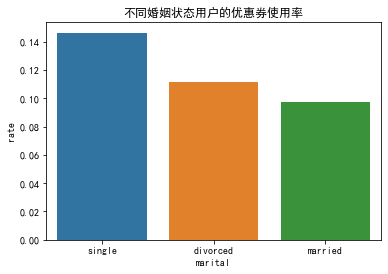

In [1044]:
orderlist = tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)['marital'].tolist()
sns.barplot(x='marital', y='rate', data=tmp[tmp['coupon_ind']==1], order=orderlist)
plt.title('不同婚姻状态用户的优惠券使用率')


- 在所有用户中，已婚用户数量最多
- 单身用户的优惠券使用率最高（14.6%）

### 信用卡是否违约的用户的优惠券使用情况

In [1045]:
pdd['default'].value_counts(1)

no     0.982144
yes    0.017856
Name: default, dtype: float64

Text(0.5, 1.0, '信用卡是否违约的用户数量')

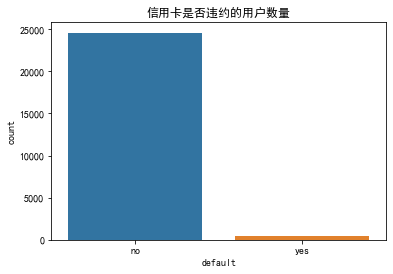

In [1046]:
sns.countplot(x='default',data=pdd, order=pdd['default'].value_counts().sort_values(ascending=False).index)
plt.title('信用卡是否违约的用户数量')

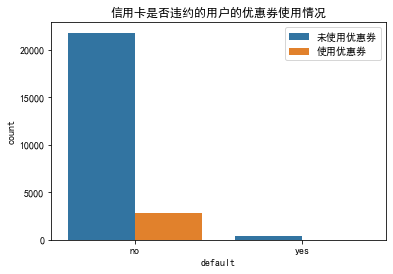

In [1047]:
sns.countplot(x='default', hue='coupon_ind', data=pdd)
plt.title('信用卡是否违约的用户的优惠券使用情况')
plt.legend(['未使用优惠券','使用优惠券'])

In [1048]:
tmp = pd.DataFrame(pdd.groupby(['default'])['coupon_ind'].value_counts(1))
tmp = tmp.rename(columns={'coupon_ind':'rate'}).reset_index()
tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)

,default,coupon_ind,rate
1,no,1,0.114130
3,yes,1,0.055928


Text(0.5, 1.0, '信用卡是否违约用户的优惠券使用率')

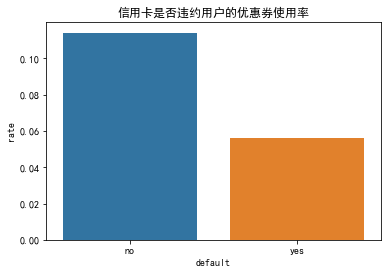

In [1049]:
orderlist = tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)['default'].tolist()
sns.barplot(x='default', y='rate', data=tmp[tmp['coupon_ind']==1], order=orderlist)
plt.title('信用卡是否违约用户的优惠券使用率')


- 只有少数用户信用卡违约
- 没有信用卡违约的用户的优惠券使用率为11.4%

### 是否退货的用户的优惠券使用情况

In [1050]:
pdd['returned'].value_counts()

yes    14014
no     11019
Name: returned, dtype: int64

Text(0.5, 1.0, '是否退货用户的数量')

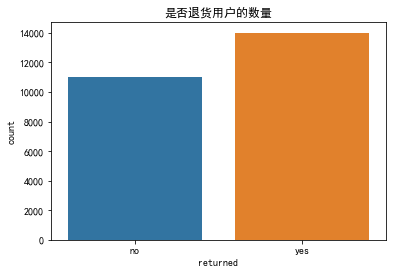

In [1051]:
sns.countplot(x='returned',data=pdd, order=pdd['default'].value_counts().sort_values(ascending=False).index)
plt.title('是否退货用户的数量')

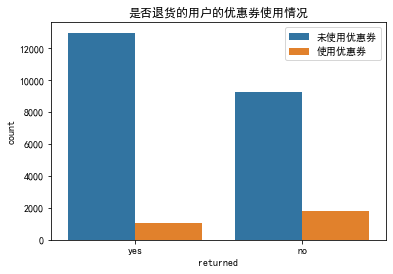

In [1052]:
sns.countplot(x='returned', hue='coupon_ind', data=pdd)
plt.title('是否退货的用户的优惠券使用情况')
plt.legend(['未使用优惠券','使用优惠券'])

In [1053]:
tmp = pd.DataFrame(pdd.groupby(['returned'])['coupon_ind'].value_counts(1))
tmp = tmp.rename(columns={'coupon_ind':'rate'}).reset_index()
tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)

,returned,coupon_ind,rate
1,no,1,0.161358
3,yes,1,0.075139


Text(0.5, 1.0, '是否退货用户的优惠券使用率')

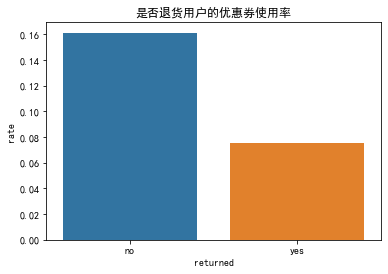

In [1054]:
orderlist = tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)['returned'].tolist()
sns.barplot(x='returned', y='rate', data=tmp[tmp['coupon_ind']==1], order=orderlist)
plt.title('是否退货用户的优惠券使用率')


- 退货的用户较多
- 未退货的用户使用优惠券使用率（16.1%）比退货的用户（7.5%）要高

### 是否使用信用卡付款的用户的优惠券使用情况

In [1055]:
pdd['loan'].value_counts()

no     20976
yes     4057
Name: loan, dtype: int64

Text(0.5, 1.0, '是否使用信用卡付款用户的数量')

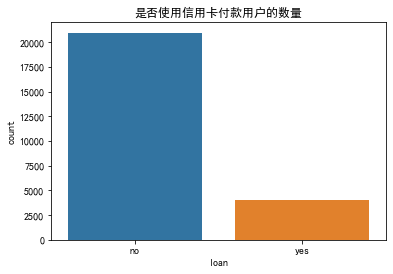

In [1056]:
sns.countplot(x='loan',data=pdd, order=pdd['default'].value_counts().sort_values(ascending=False).index)
plt.title('是否使用信用卡付款用户的数量')

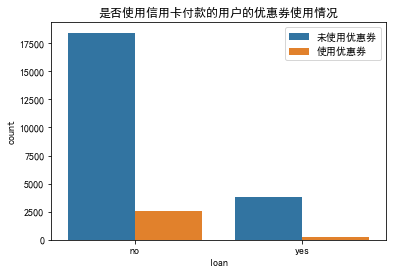

In [1057]:
sns.countplot(x='loan', hue='coupon_ind', data=pdd)
plt.title('是否使用信用卡付款的用户的优惠券使用情况')
plt.legend(['未使用优惠券','使用优惠券'])

In [1058]:
tmp = pd.DataFrame(pdd.groupby(['loan'])['coupon_ind'].value_counts(1))
tmp = tmp.rename(columns={'coupon_ind':'rate'}).reset_index()
tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)

,loan,coupon_ind,rate
1,no,1,0.121663
3,yes,1,0.068770


Text(0.5, 1.0, '是否使用信用卡付款用户的优惠券使用率')

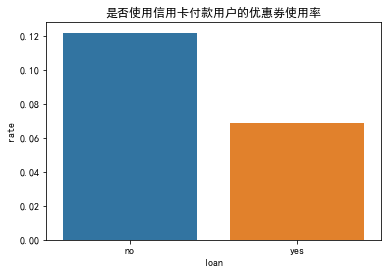

In [1059]:
orderlist = tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)['loan'].tolist()
sns.barplot(x='loan', y='rate', data=tmp[tmp['coupon_ind']==1], order=orderlist)
plt.title('是否使用信用卡付款用户的优惠券使用率')


- 大部分用户不使用信用卡付款
- 不使用信用卡付款的用户的优惠券使用率（12.2%）比使用信用卡付款（6.9%）的高

# 数据预处理

## 年龄分箱

- 之前再对年龄进行探索的时候使用过分箱，但是那个分箱是比较细的
- 对于建模来说可以不用那么细，这样可以减少需要建模的变量，也便于做模型解释

In [1060]:
pdd['age'].describe()

count    25033.000000
mean        40.528902
std          9.968850
min         18.000000
25%         32.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

In [1061]:
bins = [0, 25, 45, 65, 100]
labels = ['<25', '25-45', '45-65', '>65']
pdd['age_clean'] = pd.cut(pdd['age'], bins, labels=labels, right=False)

## 过去6个月优惠券使用情况分箱

In [1062]:
pdd['coupon_used_in_last6_month'].describe()

count    25033.000000
mean         2.779171
std          3.146620
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         55.000000
Name: coupon_used_in_last6_month, dtype: float64

- 这个变量分布较为离散，考虑将其分箱

In [1063]:
pdd['coupon_used_in_last6_month'].value_counts()

1     9685
2     6937
3     3064
4     1944
5      976
6      719
7      404
8      301
9      182
10     149
11     111
12      80
13      62
16      52
14      50
17      48
15      44
18      30
19      26
20      23
21      21
23      17
25      12
22      12
29      12
24      10
31       8
26       8
28       7
27       7
32       7
36       4
34       4
30       4
33       3
43       2
50       2
44       1
51       1
35       1
37       1
55       1
41       1
Name: coupon_used_in_last6_month, dtype: int64

- 看了一下这个分布，初步把这个变量分为0-5，6-20，21-41

In [1064]:
bins = [0, 6, 21, 42]
pdd['c6'] = pd.cut(pdd['coupon_used_in_last6_month'], bins, labels=['low', 'middle', 'high'])

## 过去1个月优惠券使用情况分箱

In [1065]:
pdd['coupon_used_in_last_month'].describe()

count    25033.000000
mean         0.289498
std          0.763161
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: coupon_used_in_last_month, dtype: float64

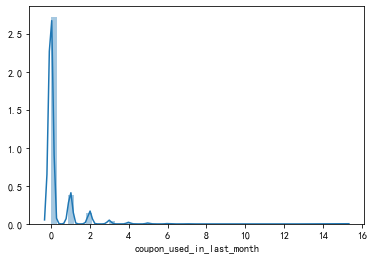

In [1066]:
sns.distplot(pdd['coupon_used_in_last_month'])

In [1067]:
bins = [0, 1, 2, 3, 15]
labels = ['0', '1', '2', '>2']
pdd['c1'] = pd.cut(pdd['coupon_used_in_last_month'], bins, labels=labels, right=False)

## 职业减少类别

In [1068]:
tmp = pd.DataFrame(pdd.groupby(['job'])['coupon_ind'].value_counts(1))
tmp = tmp.rename(columns={'coupon_ind':'rate'}).reset_index()
tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)


,job,coupon_ind,rate
17,student,1,0.268293
11,retired,1,0.178363
21,unemployed,1,0.162625
9,management,1,0.138453
1,admin.,1,0.116999
13,self-employed,1,0.116913
23,unknown,1,0.113924
19,technician,1,0.113234
15,services,1,0.090094
7,housemaid,1,0.081538


Text(0.5, 1.0, '不同职业用户的优惠券使用率')

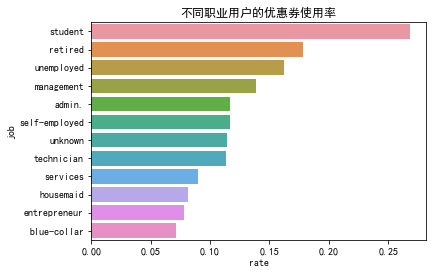

In [1069]:
orderlist = tmp[tmp['coupon_ind']==1].sort_values(by='rate', ascending=False)['job'].tolist()
sns.barplot(y='job', x='rate', data=tmp[tmp['coupon_ind']==1], order=orderlist)
plt.title('不同职业用户的优惠券使用率')
# plt.legend(['未使用优惠券','使用优惠券'])

- 数据集包含的职业类型较多，为了方便后续建模，可以将相似的职业合并成一个类型
- 根据各个职业的优惠券使用率，初步将student,retired,unemployed合并为低收入群体，management,admin,self-employed,unknown,technician合并为中高收入群体，services,housemaid合并为中等收入群体，entrepreneur,blue-collar合并为高收入群体

In [1070]:
def job_merge(job):
    if job=='student' or job=='retired' or job=='unemployed':
        return 'low'
    elif job=='management' or job=='admin.' or job=='self-employed' or job=='unknown' or job=='technician':
        return 'middle-high'
    elif job=='services' or job=='housemaid':
        return 'middle'
    elif job=='entrepreneur' or job=='blue-collar':
        return 'high'
pdd['job_clean'] = pdd['job'].apply(job_merge)
pdd.head(20)

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind,age_clean,c6,c1,job_clean
0,1,43,management,married,no,yes,no,2,0,0,25-45,low,0,middle-high
1,2,42,technician,divorced,no,yes,no,1,1,0,25-45,low,1,middle-high
2,3,47,admin.,married,no,yes,yes,2,0,0,45-65,low,0,middle-high
3,4,28,management,single,no,yes,yes,2,0,0,25-45,low,0,middle-high
4,5,42,technician,divorced,no,yes,no,5,0,0,25-45,low,0,middle-high
5,6,56,services,divorced,no,no,no,1,0,0,45-65,low,0,middle
6,7,32,management,single,no,no,no,4,0,0,25-45,low,0,middle-high
7,8,33,management,single,no,no,no,2,0,0,25-45,low,0,middle-high
8,9,32,technician,single,no,yes,yes,3,0,0,25-45,low,0,middle-high
9,10,55,management,married,no,no,yes,3,0,0,45-65,low,0,middle-high


## 哑变量处理

In [1071]:
# drop掉ID,coupon_used_in_last_month, coupon_used_in_last6_month, job, age
pdd_clean = pdd.drop(['ID','coupon_used_in_last_month', 'coupon_used_in_last6_month', 'job', 'age'], axis=1)

In [1072]:
# 类别变量转成哑变量
pdd_clean = pd.get_dummies(pdd_clean, drop_first=True)

In [1073]:
pdd_clean.head()

,coupon_ind,marital_married,marital_single,default_yes,returned_yes,loan_yes,age_clean_25-45,age_clean_45-65,age_clean_>65,c6_middle,c6_high,c1_1,c1_2,c1_>2,job_clean_low,job_clean_middle,job_clean_middle-high
0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [1074]:
corr = pdd_clean.corr()[['coupon_ind']].sort_values('coupon_ind', ascending=False)
corr 

,coupon_ind
coupon_ind,1.000000
c1_1,0.140320
job_clean_low,0.081167
c1_2,0.076783
age_clean_>65,0.069686
marital_single,0.066360
job_clean_middle-high,0.037838
c1_>2,0.025920
age_clean_25-45,-0.009942
age_clean_45-65,-0.016697


In [1075]:
# 取出相关系数绝对值大于0.05的变量
import numpy as np
threshold=0.05
var = corr.where(np.abs(corr)>threshold).dropna(how='any').index.values
var

array(['coupon_ind', 'c1_1', 'job_clean_low', 'c1_2', 'age_clean_>65',
       'marital_single', 'marital_married', 'loan_yes', 'returned_yes'],
      dtype=object)

d:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


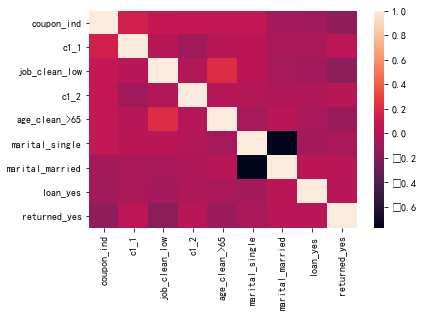

In [1076]:
sns.heatmap(pdd_clean[var].corr())

- 变量c1_1, job_clean_low, c1_2, age_clean_>65, marital_single和coupon_ind是强正相关
- 变量marital_married, loan_yes, returned_yes和coupon_ind是强负相关

# 模型建立

In [1077]:
y = pdd_clean['coupon_ind']
var = var[1:]
x = pdd_clean[var]  # x变量就是上面取出来的和coupon_ind相关系数绝对值大于0.05的那几个变量

In [1078]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [1079]:
from sklearn import linear_model
lr = linear_model.LogisticRegression(random_state=7) 

In [1080]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=7)

In [1081]:
# 输出模型拟合的截距
lr.intercept_

array([-1.89408304])

In [1082]:
# 输出模型拟合后各个变量的系数和概率比值
for var_name, coef, rate in zip(var, lr.coef_[0], np.exp(lr.coef_[0])):
    print('{}的系数：{:.4f}\t概率比值：{:.4f}'.format(var_name, coef, rate))

c1_1的系数：1.1371	概率比值：3.1176
job_clean_low的系数：0.3132	概率比值：1.3678
c1_2的系数：1.1972	概率比值：3.3108
age_clean_>65的系数：0.9227	概率比值：2.5162
marital_single的系数：0.2808	概率比值：1.3241
marital_married的系数：-0.1349	概率比值：0.8738
loan_yes的系数：-0.5513	概率比值：0.5762
returned_yes的系数：-0.8633	概率比值：0.4218


# 模型评估

In [1083]:
# 用list保存各个模型的各种指标值
model_name = []
train_accs = []
test_accs = []
f1_scores = []
precisions = []
recalls = []
AUCs = []

In [1084]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

def evaluation_print(y_train, y_pred_train, y_test, y_pred_test):
    # 训练集的准确率
    train_acc = metrics.accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)
    train_acc

    def confusion_matrix_plot(y_true, y_pred):
        data = metrics.confusion_matrix(y_true, y_pred)
        sns.heatmap(data, annot=True, annot_kws={'size':20, 'weight':'bold'}, cbar=False, fmt='.20g')
        plt.ylabel('True Label')
        plt.xlabel('Predict Label')
        plt.title('Confusion Matrix')

    # 训练集的混淆矩阵
    # confusion_matrix_plot(y_train, y_pred_train)

    # 测试集的准确率
    test_acc = metrics.accuracy_score(y_test, y_pred_test)
    test_accs.append(test_acc)

    # 测试集的混淆矩阵
    # confusion_matrix_plot(y_test, y_pred_test)

    # 测试集的precision
    test_precision = metrics.precision_score(y_test, y_pred_test)
    precisions.append(test_precision)


    # 测试集的recall
    test_recall = metrics.recall_score(y_test, y_pred_test)
    recalls.append(test_recall)


    # 测试集的f1-score
    test_f1 = metrics.f1_score(y_test, y_pred_test)
    f1_scores.append(test_f1)


    # ROC/AUC评估-测试集
    fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, y_pred_test, pos_label=1)
    test_auc = metrics.auc(fpr2,tpr2)
    AUCs.append(test_auc)
    
    # 训练集的分类报告
    print('训练集的分类报告：')
    print(classification_report(y_train, y_pred_train))

    # 测试集的分类报告
    print('测试集的分类报告：')
    print(classification_report(y_test, y_pred_test))

    # 绘制ROC-测试集
    plt.plot(fpr2, tpr2, marker='o')
    plt.title('测试集ROC')
    plt.show()

    # 输出所有评估指标的值
    print('train_acc\t test_acc\t precision\t recall\t\t f1-score\t AUC')
    print('{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}'.format(train_acc, test_acc, test_precision, test_recall, test_f1, test_auc))


训练集的分类报告：
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     15536
           1       0.46      0.01      0.02      1987

    accuracy                           0.89     17523
   macro avg       0.67      0.50      0.48     17523
weighted avg       0.84      0.89      0.84     17523

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6666
           1       0.27      0.00      0.01       844

    accuracy                           0.89      7510
   macro avg       0.58      0.50      0.47      7510
weighted avg       0.82      0.89      0.84      7510



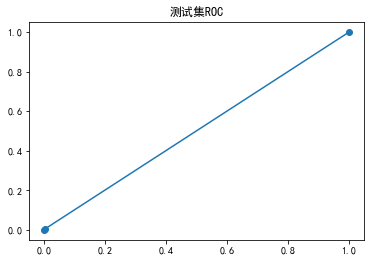

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.8864		0.8867		0.2667		0.0047		0.0093		0.5015


In [1085]:
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('Original')

evaluation_print(y_train, y_pred_train, y_test, y_pred_test)


# 模型优化
- 添加变量
- 改善数据不平衡
    - RandomUnderSampler 随机下采样
    - RandomOverSampler 随机上采样
    - SMOTE 合成上采样
    - SMOTEC 合成上采样
    - BorderlineSMOTE 合成上采样
    - RENN 下采样
    - NearMiss 下采样
    - SMOTEENN 上采样+下采样
    - SMOTETomek 上采样+下采样

## 添加变量

In [1086]:
# 把所有变量都放进模型
x = pdd_clean.drop('coupon_ind', axis=1)
y = pdd_clean['coupon_ind']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [1087]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=7)

In [1088]:
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     15536
           1       0.43      0.02      0.03      1987

    accuracy                           0.89     17523
   macro avg       0.66      0.51      0.48     17523
weighted avg       0.84      0.89      0.84     17523

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6666
           1       0.43      0.02      0.03       844

    accuracy                           0.89      7510
   macro avg       0.66      0.51      0.48      7510
weighted avg       0.84      0.89      0.84      7510



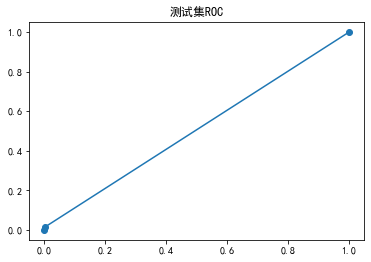

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.8860		0.8871		0.4333		0.0154		0.0297		0.5064


In [1089]:
model_name.append('AddVariable')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

- 把所有变量放进模型后准确率反而下降了，说明无关变量影响了模型性能，不予采用

## 更改损失函数的类别权重

- 更改权重就是针对不同类别的数据设置不同的分错代价，即提高少数类分错的代价或降低多数类分错的代价，最终使各类别平衡。

- 常用的机器学习训练方法中，很多都提供了权重设置参数class_weight，可以手动设置该参数，但一般情况下只需要将其设置为balanced即可

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.93      0.73      0.81     15536
           1       0.20      0.55      0.30      1987

    accuracy                           0.71     17523
   macro avg       0.56      0.64      0.55     17523
weighted avg       0.84      0.71      0.76     17523

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      6666
           1       0.21      0.54      0.30       844

    accuracy                           0.71      7510
   macro avg       0.57      0.64      0.56      7510
weighted avg       0.85      0.71      0.76      7510



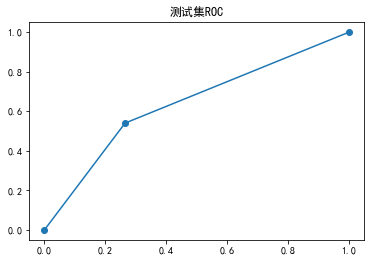

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.7055		0.7132		0.2052		0.5403		0.2975		0.6377


In [1090]:
# x,y恢复到原始模型的变量
x = pdd_clean[var]
y = pdd_clean['coupon_ind']

lr = linear_model.LogisticRegression(random_state=7, class_weight='balanced')  
# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('Balanced')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

## 改善数据不平衡

根据https://www.capallen.top/2019/Deal-with-imbalanced-data-in-ML.html
里面提到的方法，打算使用以下几种方法对模型进行改进
- 随机的采样
    - RandomUnderSampler 随机下采样
    - RandomOverSampler 随机上采样
- 改进的采样
    - 上采样
        - SMOTE
        - ADASYN
        - BorderlineSMOTE
    - 下采样
        - RENN
        - NearMiss
    - 组合采样
        - SMOTEENN
        - SMOTETomek

### RandomUnderSampler 随机下采样

In [1091]:
lr = linear_model.LogisticRegression(random_state=7)  

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.62      0.72      0.67      1987
           1       0.67      0.55      0.60      1987

    accuracy                           0.64      3974
   macro avg       0.64      0.64      0.63      3974
weighted avg       0.64      0.64      0.63      3974

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      6666
           1       0.20      0.54      0.29       844

    accuracy                           0.71      7510
   macro avg       0.56      0.63      0.55      7510
weighted avg       0.84      0.71      0.76      7510



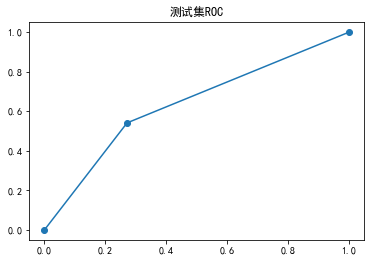

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.6369		0.7075		0.2016		0.5415		0.2938		0.6350


In [1092]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = rus.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('RandomUnderSampler')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

### RandomOverSampler 随机上采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.62      0.73      0.67     15536
           1       0.67      0.55      0.60     15536

    accuracy                           0.64     31072
   macro avg       0.64      0.64      0.63     31072
weighted avg       0.64      0.64      0.63     31072

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      6666
           1       0.21      0.54      0.30       844

    accuracy                           0.71      7510
   macro avg       0.57      0.64      0.56      7510
weighted avg       0.85      0.71      0.76      7510



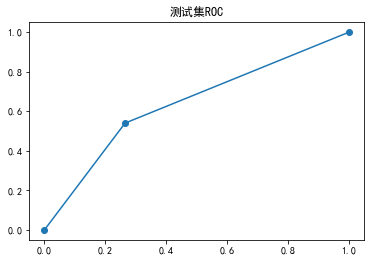

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.6365		0.7132		0.2052		0.5403		0.2975		0.6377


In [1093]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = ros.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('RandomOverSampler')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

### SMOTE 上采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.61      0.69      0.65     15536
           1       0.65      0.56      0.60     15536

    accuracy                           0.63     31072
   macro avg       0.63      0.63      0.62     31072
weighted avg       0.63      0.63      0.62     31072

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      6666
           1       0.19      0.56      0.28       844

    accuracy                           0.68      7510
   macro avg       0.56      0.63      0.54      7510
weighted avg       0.84      0.68      0.74      7510



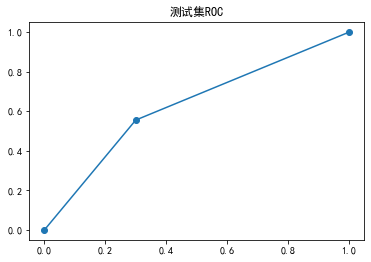

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.6265		0.6838		0.1900		0.5557		0.2831		0.6278


In [1094]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = smote.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('SMOTE')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

### ADASYN上采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.58      0.62      0.60     15536
           1       0.61      0.57      0.59     15938

    accuracy                           0.59     31474
   macro avg       0.59      0.59      0.59     31474
weighted avg       0.59      0.59      0.59     31474

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      6666
           1       0.16      0.59      0.26       844

    accuracy                           0.62      7510
   macro avg       0.54      0.61      0.50      7510
weighted avg       0.84      0.62      0.69      7510



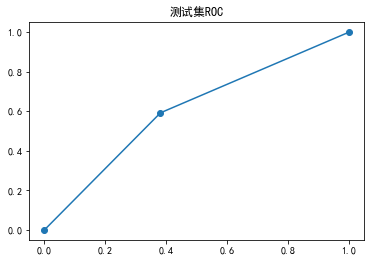

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.5943		0.6157		0.1644		0.5924		0.2573		0.6055


In [1095]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)

# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = adasyn.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('ADASYN')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

### BorderlineSMOTE上采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.69      0.62      0.65     15536
           1       0.65      0.72      0.69     15536

    accuracy                           0.67     31072
   macro avg       0.67      0.67      0.67     31072
weighted avg       0.67      0.67      0.67     31072

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      6666
           1       0.16      0.59      0.26       844

    accuracy                           0.62      7510
   macro avg       0.54      0.61      0.50      7510
weighted avg       0.84      0.62      0.69      7510



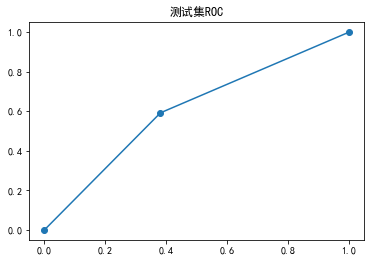

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.6710		0.6157		0.1644		0.5924		0.2573		0.6055


In [1096]:
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state=42)


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = bsmote.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('BorderlineSMOTE')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

### RENN下采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11678
           1       0.88      0.31      0.46      1987

    accuracy                           0.89     13665
   macro avg       0.89      0.65      0.70     13665
weighted avg       0.89      0.89      0.87     13665

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6666
           1       0.27      0.31      0.29       844

    accuracy                           0.83      7510
   macro avg       0.59      0.60      0.59      7510
weighted avg       0.84      0.83      0.83      7510



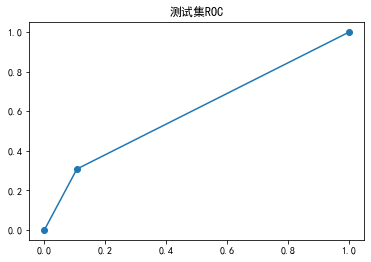

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.8935		0.8276		0.2678		0.3081		0.2865		0.6007


In [1097]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
renn = RepeatedEditedNearestNeighbours()


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = renn.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('RENN')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

### NearMiss下采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.62      0.72      0.67      1987
           1       0.67      0.56      0.61      1987

    accuracy                           0.64      3974
   macro avg       0.64      0.64      0.64      3974
weighted avg       0.64      0.64      0.64      3974

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      6666
           1       0.20      0.56      0.29       844

    accuracy                           0.70      7510
   macro avg       0.56      0.64      0.55      7510
weighted avg       0.85      0.70      0.75      7510



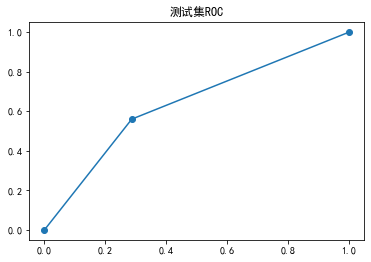

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.6397		0.6959		0.1982		0.5604		0.2929		0.6367


In [1098]:
from imblearn.under_sampling import NearMiss 
nm = NearMiss()


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = nm.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('NearMiss')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

### SMOTEENN组合采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11122
           1       0.93      0.90      0.91       619

    accuracy                           0.99     11741
   macro avg       0.96      0.95      0.95     11741
weighted avg       0.99      0.99      0.99     11741

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6666
           1       0.36      0.07      0.11       844

    accuracy                           0.88      7510
   macro avg       0.63      0.53      0.52      7510
weighted avg       0.83      0.88      0.84      7510



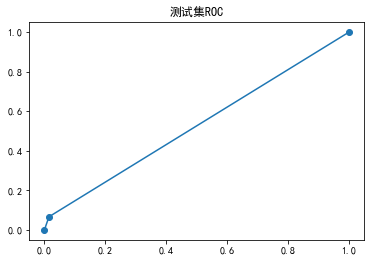

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.9908		0.8819		0.3613		0.0664		0.1121		0.5257


In [1099]:
from imblearn.combine import SMOTEENN
smoteen = SMOTEENN(random_state=42)


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = smoteen.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('SMOTEENN')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

### SMOTETomek组合采样

训练集的分类报告：
              precision    recall  f1-score   support

           0       0.61      0.69      0.65     15536
           1       0.65      0.56      0.60     15536

    accuracy                           0.63     31072
   macro avg       0.63      0.63      0.62     31072
weighted avg       0.63      0.63      0.62     31072

测试集的分类报告：
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      6666
           1       0.19      0.56      0.28       844

    accuracy                           0.68      7510
   macro avg       0.56      0.63      0.54      7510
weighted avg       0.84      0.68      0.74      7510



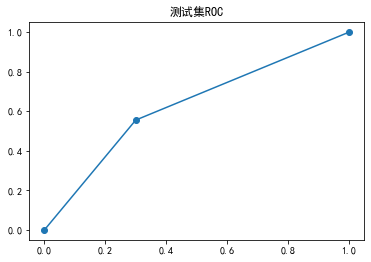

train_acc	 test_acc	 precision	 recall		 f1-score	 AUC
0.6265		0.6838		0.1900		0.5557		0.2831		0.6278


In [1100]:
from imblearn.combine import SMOTETomek
smotet = SMOTETomek(random_state=42)


# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train, y_train = smotet.fit_resample(x_train, y_train)

# 模型拟合
lr.fit(x_train, y_train)

# 模型预测
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

model_name.append('SMOTETomek')
evaluation_print(y_train, y_pred_train, y_test, y_pred_test)

## 最终模型

In [1101]:
len(test_aucs)

11

In [1102]:
models_evaluation = pd.DataFrame({'method':model_name, 'train_acc':train_accs, 'test_acc':test_accs, 'precision':precisions,  'recall': recalls, 'f1_score':f1_scores, 'AUC':AUCs})
models_evaluation

,method,train_acc,test_acc,precision,recall,f1_score,AUC
0,Original,0.886435,0.886684,0.266667,0.004739,0.009313,0.501545
1,AddVariable,0.886035,0.887084,0.433333,0.015403,0.029748,0.506426
2,Balanced,0.705473,0.713182,0.205221,0.540284,0.297456,0.637679
3,RandomUnderSampler,0.636890,0.707457,0.201588,0.541469,0.293796,0.634971
4,RandomOverSampler,0.636457,0.713182,0.205221,0.540284,0.297456,0.637679
5,SMOTE,0.626513,0.683755,0.189955,0.555687,0.283127,0.627829
6,ADASYN,0.594300,0.615712,0.164366,0.592417,0.257334,0.605539
7,BorderlineSMOTE,0.671022,0.615712,0.164366,0.592417,0.257334,0.605539
8,RENN,0.893524,0.827563,0.267765,0.308057,0.286501,0.600698
9,NearMiss,0.639658,0.695872,0.198240,0.560427,0.292879,0.636724


Text(0.5, 6.800000000000068, 'method')

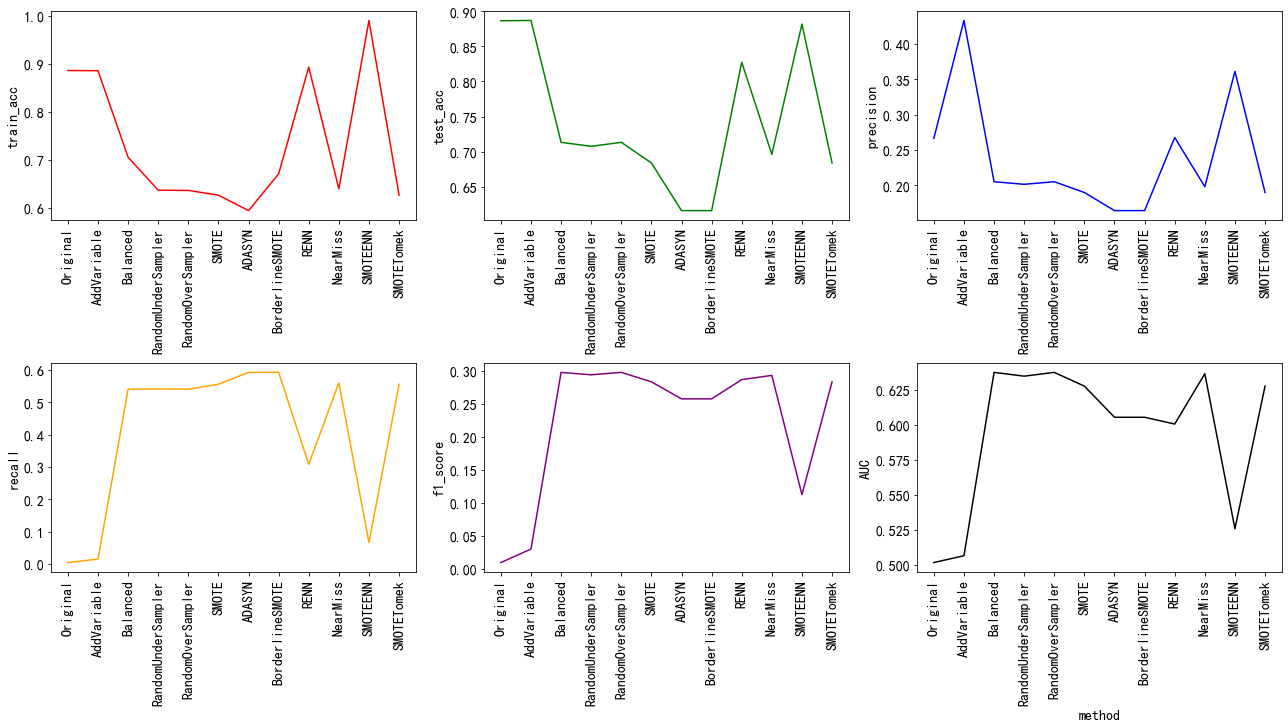

In [1103]:
plt.figure(figsize=(18, 10))
colors = ['r','g', 'b', 'orange', 'purple', 'black']
cols = models_evaluation.columns.values
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.plot(models_evaluation[cols[0]], models_evaluation[cols[i+1]], colors[i])
    plt.tick_params(labelsize=14)
    plt.ylabel(cols[i+1], size=14)
    plt.xticks(rotation=90)
    plt.tight_layout(h_pad=1)
plt.xlabel(cols[0], size=14)

- 经过上面多种改善数据不平衡方法的尝试，大部分方法都对原模型在精确率、召回率、f1-score有了不同程度的提升
- 综合下来，选择各方面都较出色的更改损失函数的类别权重的方法

In [1106]:
lr = linear_model.LogisticRegression(random_state=7, class_weight='balanced')  
# 数据集分割7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# 模型拟合
lr.fit(x_train, y_train)


LogisticRegression(class_weight='balanced', random_state=7)

In [1107]:
# 输出模型拟合后各个变量的系数和概率比值
for var_name, coef, rate in zip(var, lr.coef_[0], np.exp(lr.coef_[0])):
    print('{}的系数：{:.4f}\t概率比值：{:.4f}'.format(var_name, coef, rate))

c1_1的系数：1.0895	概率比值：2.9728
job_clean_low的系数：0.2608	概率比值：1.2979
c1_2的系数：1.1283	概率比值：3.0903
age_clean_>65的系数：1.0840	概率比值：2.9566
marital_single的系数：0.2590	概率比值：1.2956
marital_married的系数：-0.1856	概率比值：0.8306
loan_yes的系数：-0.5073	概率比值：0.6021
returned_yes的系数：-0.7893	概率比值：0.4542


c1_2系数解读
- c1_2系数为1.1283，c1_2对应的coupon_ind变量是0和1。
- 那么我们可以做出如下假设：
    - 当c1_1=0时，用户前一个月使用优惠券不是1次，目标用户使用优惠券的概率是1-p
    - 当c1_1=1时，用户前一个月使用优惠券为1次，目标用户使用优惠券的概率是p
- 我们计算的系数，就是对应到事件发生(p)与不发生(1-p)概率比值的log转换
    - 结合公式，即为ln(p/1-p)就等于1.1283，也就是说p/1-p=exp(1.1283)=3.0905。
- 所以我们可以说，在前一个月使用了2次优惠券的用户在本次活动中使用优惠券的概率是其他用户3倍。

job_clean_low系数解读
- 本案例建立的模型中，job_clean_low系数为0.2608，job_clean_low对应的coupon_ind变量是0和1。
- 那么我们可以做出如下假设：
    - 当job_clean_low=0时，用户不是低收入群体，目标用户使用优惠券的概率是1-p
    - 当job_clean_low=1时，用户是低收入群体，目标用户使用优惠券的概率是p
- 我们计算的系数，就是对应到事件发生(p)与不发生(1-p)概率比值的log转换
    - 结合公式，即为ln(p/1-p)就等于0.2608，也就是说p/1-p=exp(0.2608)=1.2979。
- 所以我们可以说，低收入用户的优惠券使用概率是非低收入用户的1.3倍。

同理
- 年龄大于65岁的用户使用优惠券的概率是其他用户的3倍
- 单身用户使用优惠券概率是其他用户的1.3倍
- 已婚用户使用优惠券的概率是其他用户的0.83倍
- 使用信用卡付款的用户使用优惠券的概率是不使用信用卡用户的0.6倍
- 有退货行为的用户使用优惠券的概率是没有过退货行为用户的0.5倍

# 业务解读

- 使用拼多多APP的用户年龄主要在在20-70之间
- 小于35岁和大于60岁的用户更倾向于使用优惠券
- 而在35~60岁间的用户更倾向于不使用优惠券
- 小于35岁的用户更倾向于使用优惠券的原因是比较好理解的，因为年轻用户对APP的使用更为熟悉，更容易掌握优惠券的用法，而大于60岁的用户由于数量比较少，是否能直接得出他们更倾向于使用优惠券这一结论是不太靠谱的；
- 而35岁到60岁之间的用户随着年龄增长用户量也随之减少，不倾向于使用优惠券的原因可能是不清楚APP推出的优惠券活动，或者是因为经济能力比较好而无需费心使用优惠券。

- 用户过去6个月优惠券使用数量大部分少于0-10次

- 用户过去1个月优惠券使用数量大部分少于2次

- 在所有职业中，蓝领用户最多，其次是管理人员, 技术人员, 行政人员, 服务行业人员
- 使用了优惠券的用户中，管理人员最多，其次是技术人员, 蓝领用户, 行政人员, 服务行业人员
- 但是在各个职业群体中，优惠券使用率最高的是学生、退休人员、无业、管理人员、行政人员

- 在所有用户中，已婚用户数量最多
- 单身用户的优惠券使用率最高（14.6%）

- 只有少数用户信用卡违约
- 没有信用卡违约的用户的优惠券使用率为11.4%

- 退货的用户较多
- 未退货的用户使用优惠券使用率（16.1%）比退货的用户（7.5%）要高

- 大部分用户不使用信用卡付款
- 不使用信用卡付款的用户的优惠券使用率（12.2%）比使用信用卡付款（6.9%）的高

- 前一个月使用了2次优惠券的用户在本次活动中使用优惠券的概率是其他用户3倍
- 低收入用户的优惠券使用概率是非低收入用户的1.3倍。
- 年龄大于65岁的用户使用优惠券的概率是其他用户的3倍
- 单身用户使用优惠券概率是其他用户的1.3倍
- 未婚用户使用优惠券的概率是已婚用户的0.83倍
- 不使用信用卡付款的用户使用优惠券的概率是使用信用卡用户的0.6倍
- 不退货的用户使用优惠券的概率是退货用户的0.5倍

# 业务建议

- 持续关注年轻人（小于35岁）和老年人（大于60岁）用户的使用优惠券情况，保持这部分群体的优惠券使用率
- 低收入群体，包括学生、老人、无业人员往往更倾向于使用优惠券，可以向这部分人投放更多优惠券
- 老年人、单身用户、不使用信用卡付款、没有过退货行为的用户比他们相反群体的用户的优惠券使用概率要高，可以向这部分人投放更多优惠券
- 中高收入群体是APP的主要使用群体，要想办法提高他们的优惠券使用率